In [ ]:
# LOAD DATA

In [7]:
import pandas as pd

# load all CSV files
sales = pd.read_csv('sales.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv ('stores.csv')
#print( features.to_string())


In [18]:
# Check shape and info
'''print(sales.shape, sales.info())
print(features.shape,features.info())
print(stores.shape,stores.info())'''

'print(sales.shape, sales.info())\nprint(features.shape,features.info())\nprint(stores.shape,stores.info())'

In [23]:
# DATA CLEANING

# check missing values
'''print(sales.isnull().sum())
print()
print(features.isnull().sum())
print()
print(stores.isnull().sum())'''

'print(sales.isnull().sum())\nprint()\nprint(features.isnull().sum())\nprint()\nprint(stores.isnull().sum())'

In [44]:
# check duplicates
'''print(sales.duplicated().sum())
print()
print(features.duplicated().sum())
print()
print(stores.duplicated().sum())'''

0

0

0


In [8]:
#convert dates to datetime
sales['Date']=pd.to_datetime(sales['Date'])
features['Date']=pd.to_datetime(features['Date'])
print(sales.dtypes)
print(features.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
dtype: object
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
dtype: object


In [9]:
# merge all tables
df = sales.merge(features, on = ['Store','Date'],how = 'left')
df1 = df.merge(stores, on = 'Store', how = 'left')
print(df1)
df1.dtypes
for col in df1.columns:
    print(col,type(df1[col].iloc[0]))
    



        Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  \
0           1     1 2010-02-05      24924.50            0        42.31   
1           1     1 2010-02-12      46039.49            1        38.51   
2           1     1 2010-02-19      41595.55            0        39.93   
3           1     1 2010-02-26      19403.54            0        46.63   
4           1     1 2010-03-05      21827.90            0        46.50   
...       ...   ...        ...           ...          ...          ...   
421565     45    98 2012-09-28        508.37            0        64.88   
421566     45    98 2012-10-05        628.10            0        64.89   
421567     45    98 2012-10-12       1061.02            0        54.47   
421568     45    98 2012-10-19        760.01            0        56.47   
421569     45    98 2012-10-26       1076.80            0        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0             2.57       0.00     

In [4]:
# EXPLORATORY ANALYSIS
# summary overview

print(sales.describe())
print(features.describe())
print(features.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales      IsHoliday  
count  421570.000000  421570.000000  
mean    15981.258123       0.070358  
min     -4988.940000       0.000000  
25%      2079.650000       0.000000  
50%      7612.030000       0.000000  
75%     20205.852500       0.000000  
max    693099.360000       1.000000  
std     22711.183519       0.255750  
             Store         

In [49]:
# unique values for cateogorical column
print(stores['Type'].unique ())
print(sales['Dept']. unique())

['A' 'B' 'C']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [5]:
# Correlation
# which factors affect sales more
df= df1.select_dtypes(include=['int64','float64'])
corr = df.corr()
print(corr)

                 Store      Dept  Weekly_Sales  IsHoliday_x  Temperature  \
Store         1.000000  0.024004     -0.085195    -0.000548    -0.050097   
Dept          0.024004  1.000000      0.148032     0.000916     0.004437   
Weekly_Sales -0.085195  0.148032      1.000000     0.012774    -0.002312   
IsHoliday_x  -0.000548  0.000916      0.012774     1.000000    -0.155949   
Temperature  -0.050097  0.004437     -0.002312    -0.155949     1.000000   
Fuel_Price    0.065240  0.003569     -0.000123    -0.078011     0.143762   
MarkDown1    -0.059844  0.001494      0.047172    -0.003521    -0.026415   
MarkDown2    -0.033829  0.000587      0.020716     0.207604    -0.179672   
MarkDown3    -0.020331  0.001475      0.038562     0.266471    -0.056026   
MarkDown4    -0.042724  0.001937      0.037467     0.011565    -0.050281   
MarkDown5    -0.012452  0.002668      0.050465    -0.015235    -0.014752   
CPI          -0.211088 -0.007477     -0.020921    -0.001943     0.182110   
Unemployment

In [12]:
# Seasonal Pattern (month -wise sales)
df1['month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('month')['Weekly_Sales'].mean()
print(monthly_sales)


month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64


In [21]:
#Find top 10 weeks with highest sales
top10_weeks = df1.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
print(top10_weeks)


Date
2010-12-24    80931415.60
2011-12-23    76998241.31
2011-11-25    66593605.26
2010-11-26    65821003.24
2010-12-17    61820799.85
2011-12-16    60085695.94
2010-12-10    55666770.39
2011-12-09    55561147.70
2012-04-06    53502315.87
2012-07-06    51253021.88
Name: Weekly_Sales, dtype: float64


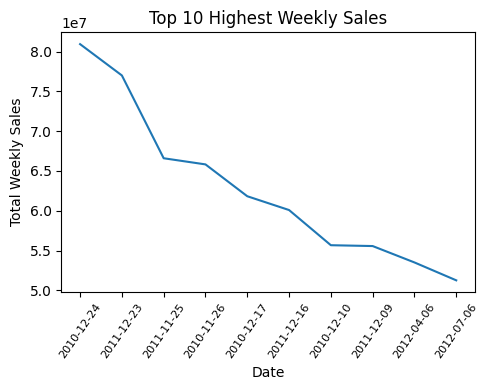

In [37]:
import matplotlib.pyplot as plt
# Top 10 weekly sales
plt.figure(figsize=(5,4))
plt.plot(top10_weeks.index.astype(str), top10_weeks.values)
plt.title("Top 10 Highest Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=55,fontsize=8)
plt.tight_layout()
plt.show()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64


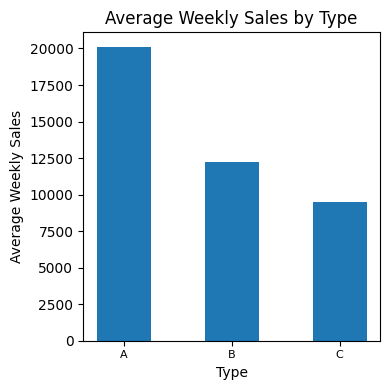

In [57]:
# Sales by type 
sales_by_type = df1.groupby('Type')['Weekly_Sales'].mean()
print(sales_by_type)
plt.figure(figsize=(4,4))
plt.bar(sales_by_type.index, sales_by_type.values, width = 0.5)
plt.title("Average Weekly Sales by Type")
plt.xlabel("Type")
plt.ylabel("Average Weekly Sales")
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()